# Importing Required Libraries

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image

C:\Program Files\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
dataset_path = "dataset" # Dataset path

In [3]:
## Listing out all animal classes

classes = os.listdir(dataset_path)
print("Animal classes : ")
for cls in classes:
    print(cls)
print("\nTotal number of classes : ", len(classes))

Animal classes : 
Bear
Bird
Cat
Cow
Deer
Dog
Dolphin
Elephant
Giraffe
Horse
Kangaroo
Lion
Panda
Tiger
Zebra

Total number of classes :  15


In [4]:
## Counting images in each class

class_count = {}
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    class_count[cls] = len(os.listdir(class_path))

for cls, count in class_count.items():
    print(f"{cls}: {count} images")

Bear: 125 images
Bird: 137 images
Cat: 123 images
Cow: 131 images
Deer: 127 images
Dog: 122 images
Dolphin: 129 images
Elephant: 133 images
Giraffe: 129 images
Horse: 130 images
Kangaroo: 126 images
Lion: 131 images
Panda: 135 images
Tiger: 129 images
Zebra: 137 images


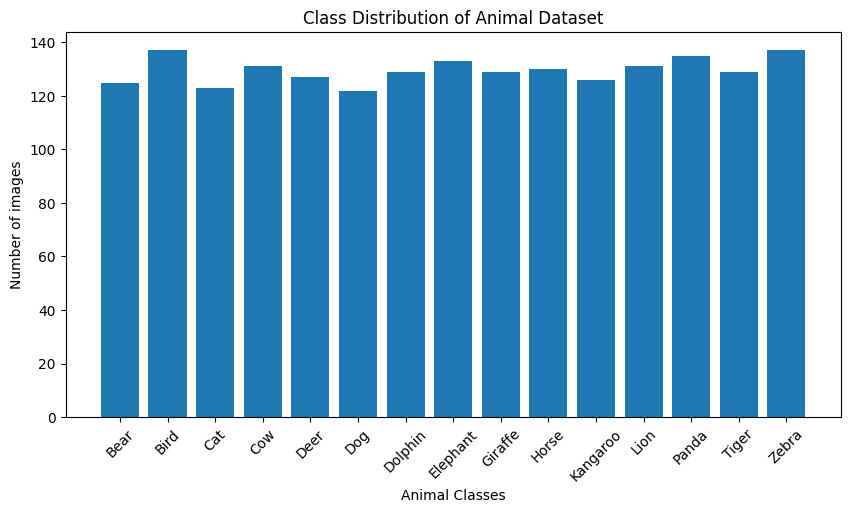

In [5]:
## Visualizing class distribution (Graph)

plt.figure(figsize=(10, 5))
plt.bar(class_count.keys(), class_count.values())
plt.xticks(rotation=45)
plt.xlabel("Animal Classes")
plt.ylabel("Number of images")
plt.title("Class Distribution of Animal Dataset")
plt.show()

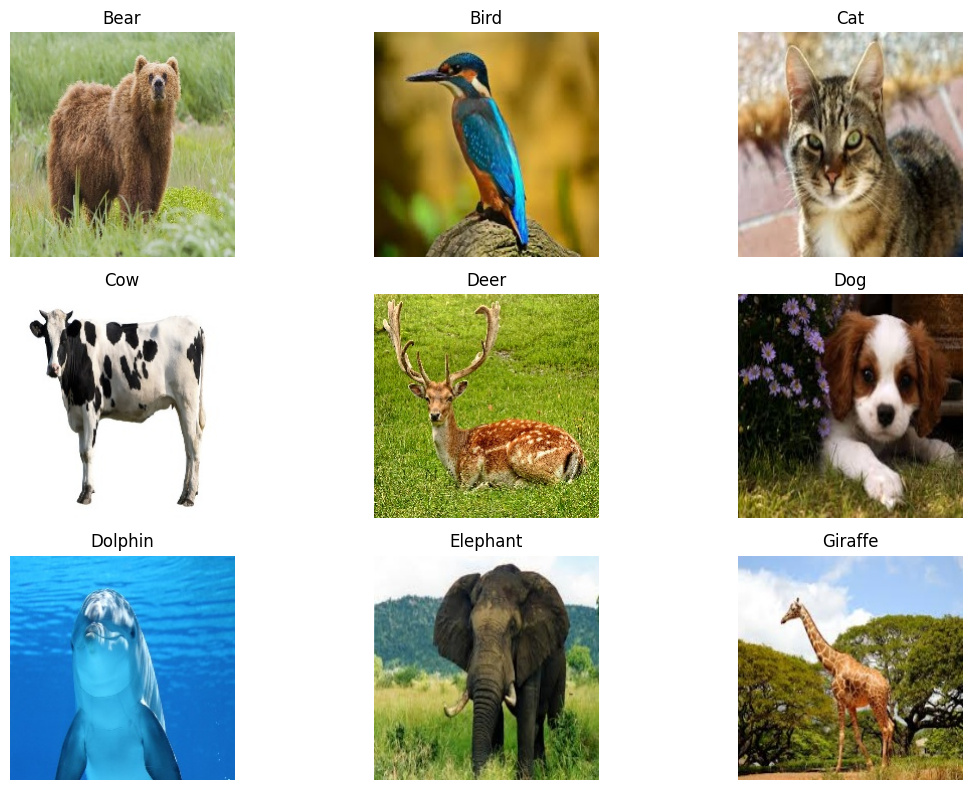

In [6]:
## Display sample images from each class

plt.figure(figsize=(12, 8))
for i, cls in enumerate(classes[:9]):
    img_folder = os.path.join(dataset_path, cls)
    img_name = os.listdir(img_folder)[0]
    img_path = os.path.join(img_folder, img_name)
    img = Image.open(img_path)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [7]:
## Check image shape

sample_class = classes[0]
sample_image_path = os.path.join(dataset_path, sample_class, os.listdir(os.path.join(dataset_path, sample_class))[0])
img = Image.open(sample_image_path)
img_array = np.array(img)
print("Image shape: ", img_array.shape)

Image shape:  (224, 224, 3)


## explaination of the output....

224 -> height

224 -> width

3 -> RGB channels

# phase 2 :- Data Preprocessing 

In [8]:
# Defining the constants

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
DATASET_PATH = "dataset"

In [9]:
#Normalization + validation split

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  
)

In [10]:
train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 1561 images belonging to 15 classes.


In [11]:
## Create Validation Data Generator

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 383 images belonging to 15 classes.


In [12]:
print("Class labels : ")
print(train_data.class_indices)

Class labels : 
{'Bear': 0, 'Bird': 1, 'Cat': 2, 'Cow': 3, 'Deer': 4, 'Dog': 5, 'Dolphin': 6, 'Elephant': 7, 'Giraffe': 8, 'Horse': 9, 'Kangaroo': 10, 'Lion': 11, 'Panda': 12, 'Tiger': 13, 'Zebra': 14}


In [13]:
images, labels = next(train_data)
print("Image batch shape : ", images.shape)
print("Label batch shape : ", labels.shape)

Image batch shape :  (32, 224, 224, 3)
Label batch shape :  (32, 15)


# PHASE 3 MODEL BUIDLING(TRANSFER LEARNING)

## Model used :- MobileNetV2

In [14]:
## Load pre-trained MobileNetV2

base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

In [15]:
## Freezing prevents weight and avoids overfitting (Freeze base model)

base_model.trainable = False

In [16]:
## Build Custom Classification Head.

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(15, activation='softmax')
])

In [17]:
## Compile the model

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Categorical crossentropy for the Multi-class classification problem

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,887 (9.25 MB)

 Trainable params: 165,903 (648.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Model training and Evaluation

In [19]:
## Define training parameters

EPOCHS = 10

In [20]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 45s 806ms/step - accuracy: 0.6951 - loss: 1.0905 - val_accuracy: 0.8486 - val_loss: 0.4889
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 406ms/step - accuracy: 0.9161 - loss: 0.2911 - val_accuracy: 0.8825 - val_loss: 0.4494
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 449ms/step - accuracy: 0.9667 - loss: 0.1462 - val_accuracy: 0.8903 - val_loss: 0.4292
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 453ms/step - accuracy: 0.9821 - loss: 0.0890 - val_accuracy: 0.8930 - val_loss: 0.3944
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 446ms/step - accuracy: 0.9949 - loss: 0.0496 - val_accuracy: 0.8982 - val_loss: 0.3607
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 446ms/step - accuracy: 0.9981 - loss: 0.0302 - val_accuracy: 0.8956 - val_loss: 0.3471
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 458ms/step - accuracy: 1.0000 - loss: 0.0219 - val_accuracy: 0.8930 - val_loss: 0.3500
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 446ms/step - accuracy: 0.9994 - loss: 0.0182 - val_accu

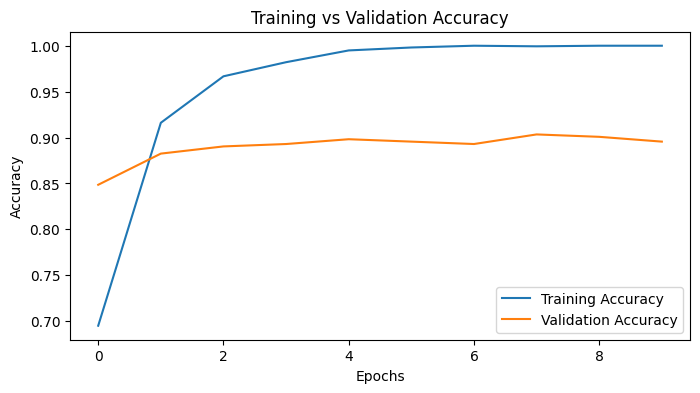

In [21]:
## Plotting Accuracy and Loss Graphs

# 1. Accuracy plot
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

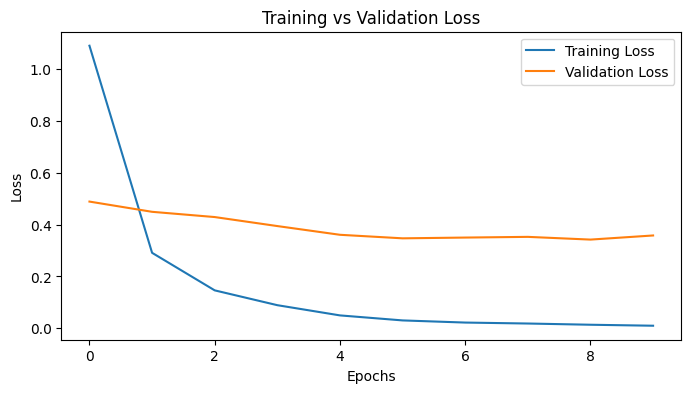

In [22]:
# 2. Loss plot

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [23]:
## Evaluate Model Performance

loss, accuracy = model.evaluate(val_data)

print(f"validation summary: {accuracy*100 : .2f}%")
print(f"validation Loss {loss : .4f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 365ms/step - accuracy: 0.8956 - loss: 0.3581
validation summary:  89.56%
validation Loss  0.3581%


In [24]:
model.save("animal_classifier_model.h5")

## Prediction on new animal images

In [25]:
## Load the saved model

model = tf.keras.models.load_model("animal_classifier_model.h5")

In [26]:
## Load class labels automatically

class_indices = train_data.class_indices   # from Phase-2
class_labels = {v: k for k, v in class_indices.items()}

In [27]:
## Picking image safely from dataset

dataset_path = "dataset"
# test_class = "Tiger"   # you can change this
test_class = "Cow"   # you can change this
class_folder = os.path.join(dataset_path, test_class)
image_name = os.listdir(class_folder)[0]   # pick first image
img_path = os.path.join(class_folder, image_name)
print("Using image:", img_path)

Using image: dataset\Cow\Cow_1.jpg


In [28]:
## Load and preprocess image

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [29]:
## Prediction

prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)
predicted_label = class_labels[predicted_index]
print("Predicted Animal:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Animal: Cow


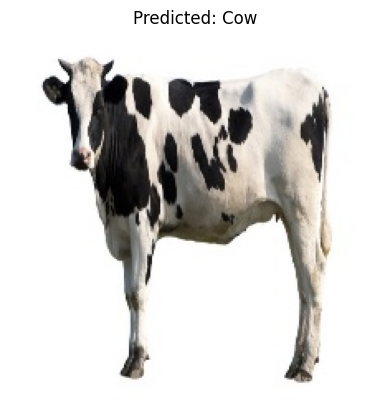

In [30]:
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()